In [7]:
import pandas as pd 
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt  

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam 


In [13]:
df = pd.read_csv(r"C:\Users\Mahajan\Desktop\Final Year Codes\DL\boston_housing.csv")


In [15]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [17]:
x = df.drop(columns=['MEDV'])
y = df['MEDV']

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)


In [21]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [23]:
model= Sequential([
    Dense(64,activation = 'relu',input_shape = (13,)),
    Dense(64,activation = 'relu'),
    Dense(1)
])

D:\AS\anaconda-jupyternotebook\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
model.compile(loss = 'mse',optimizer = Adam(learning_rate=0.001),metrics=['mae'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,121 (20.00 KB)

 Trainable params: 5,121 (20.00 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
early_stop = EarlyStopping(monitor='val_loss',patience = 10,restore_best_weights =True)

In [29]:
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs = 200,batch_size=32,verbose=1,callbacks = early_stop)

Epoch 1/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - loss: 587.6193 - mae: 22.4527 - val_loss: 481.1340 - val_mae: 20.2586
Epoch 2/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 501.6798 - mae: 20.7863 - val_loss: 423.6606 - val_mae: 18.8324
Epoch 3/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 457.6942 - mae: 19.4495 - val_loss: 346.4989 - val_mae: 16.8272
Epoch 4/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 394.3396 - mae: 17.8006 - val_loss: 249.3402 - val_mae: 14.0414
Epoch 5/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 275.9666 - mae: 14.3009 - val_loss: 150.4844 - val_mae: 10.5553
Epoch 6/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 163.0609 - mae: 10.5758 - val_loss: 78.3172 - val_mae: 7.3333
Epoch 7/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 89.5173 - mae: 7.2173 - val_loss: 48.1595 - val_mae: 5.1933
Epoch 8/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 54.4726 - mae: 5.8215 - val_loss: 37.8460 - val_mae: 4.3691
Epoch 9/200
13/13 ━━━━━━━

In [33]:
loss,mae = model.evaluate(x_test,y_test,verbose=2)

4/4 - 0s - 11ms/step - loss: 9.7328 - mae: 1.9786


In [35]:
# Make predictions
y_pred = model.predict(x_test)# Calculate additional regression metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print additional metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Mean Squared Error (MSE): 9.73
Mean Absolute Error (MAE): 1.98
R-squared (R2): 0.87


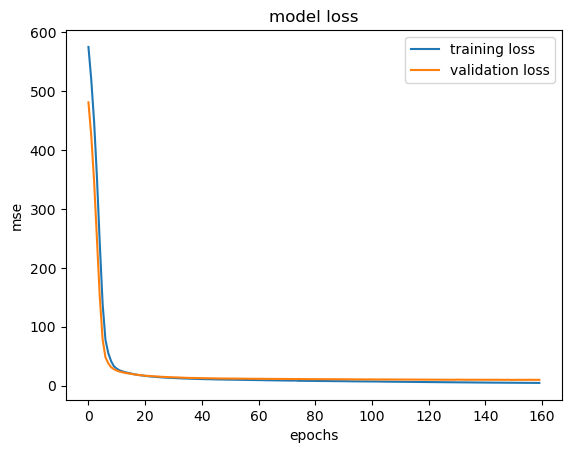

In [37]:
plt.plot(history.history['loss'],label='training loss')
plt.plot(history.history['val_loss'],label = 'validation loss')
plt.xlabel('epochs')
plt.ylabel('mse')
plt.legend()
plt.title('model loss')
plt.show()

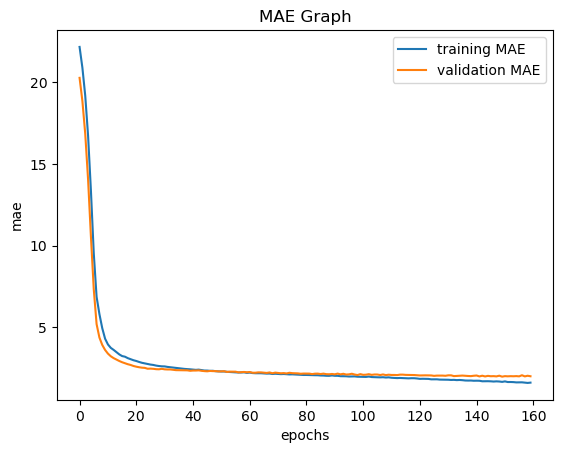

In [39]:
plt.plot(history.history['mae'],label='training MAE')
plt.plot(history.history['val_mae'],label = 'validation MAE')
plt.xlabel('epochs')
plt.ylabel('mae')
plt.legend()
plt.title('MAE Graph')
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


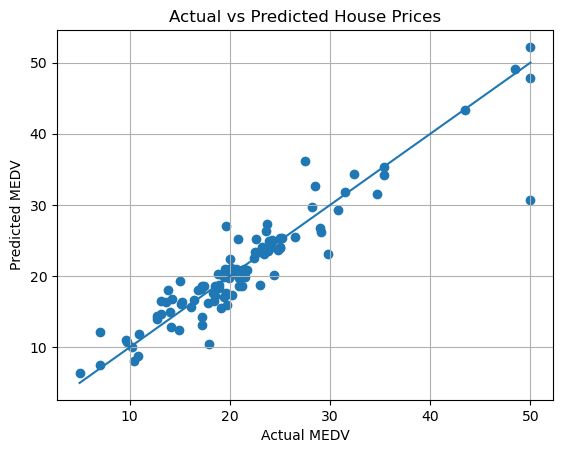

In [41]:
# Predict the house prices on test data
y_pred = model.predict(x_test)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual MEDV')
plt.ylabel('Predicted MEDV')
plt.grid()
plt.title('Actual vs Predicted House Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])  # Line y=x

plt.show()
